# Linea B
Hipotesis: 
La cercania a las estaciones de la linea B influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea b y veremos si la distancia a las paradas de est influye en el precio de las propiedades.
Primer aproach, tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta

subte B: San nicolas, Balvanera, Almagro, Villa crespo, Chacarita

subte A: inicia entre los barrios (Monserrat y San nicolas) , luego balvanera, Almagro y caballito

subte B: San nicolas, Balvanera, Almagro, Villa crespo, Chacarita

subte C: Retiro, San nicolas, Monserrat, Constitucion

subte D: Monserrat, SAn nicolas, Balvanera, Recoleta, Palermo, Belgrano

subate E: Monserrat, Constitucion, San cristobal, boedo, Parque chacabuco, Parque avellaneda.

subte H: Balvanera


In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#Comenzamos por el barrio de caballito

#Data de properati
df = pd.read_csv('/home/matias/Escritorio/notebook/properati-AR-2017-08-01-properties-sell.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoB= propCFf[propCFf.place_name.str.contains('San Nicolas') |
                        propCFf.place_name.str.contains('Balvanera')|
                        propCFf.place_name.str.contains('Almagro')|
                        propCFf.place_name.str.contains('Villa Crespo')|
                        propCFf.place_name.str.contains('Chacarita')]

propRecorridoB.dropna(inplace = True)
propRecorridoB.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 366 to 186082
Data columns (total 6 columns):
property_type    2528 non-null object
place_name       2528 non-null object
rooms            2528 non-null float64
lat              2528 non-null float64
lon              2528 non-null float64
price            2528 non-null float64
dtypes: float64(4), object(2)
memory usage: 138.2+ KB


/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Tomaremos como referencia las estaciones Medrano Angel Gallardo y Carlos Gardel
Para esto cargamos los datos de la linea B

In [2]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesB = df[df['LINEA'] == 'B']
estacionesB.head(20)

,X,Y,ID,ESTACION,LINEA
19,-58.375072,-34.603297,20.0,FLORIDA,B
20,-58.380715,-34.603637,21.0,C. PELLEGRINI,B
21,-58.387296,-34.604094,22.0,URUGUAY,B
22,-58.392314,-34.604420,23.0,CALLAO,B
23,-58.399474,-34.604643,24.0,PASTEUR - AMIA,B
24,-58.405399,-34.604581,25.0,PUEYRREDON,B
25,-58.411763,-34.604080,26.0,CARLOS GARDEL,B
26,-58.420962,-34.603165,27.0,MEDRANO,B
27,-58.431274,-34.602162,28.0,ANGEL GALLARDO,B
28,-58.439771,-34.598967,29.0,MALABIA - OSVALDO PUGLIESE,B


In [3]:
#Tomamos las estaciones que nos interesan

estaciones = estacionesB[estacionesB.ESTACION.str.contains('ANGEL GALLARDO') | 
                         estacionesB.ESTACION.str.contains('MEDRANO') |
                         estacionesB.ESTACION.str.contains('CARLOS GARDEL')  ]
estaciones.head()

,X,Y,ID,ESTACION,LINEA
25,-58.411763,-34.604080,26.0,CARLOS GARDEL,B
26,-58.420962,-34.603165,27.0,MEDRANO,B
27,-58.431274,-34.602162,28.0,ANGEL GALLARDO,B


In [4]:
#florida
florida_lon = estacionesB.loc[estacionesB.index[0],'X']
florida_lat = estacionesB.loc[estacionesB.index[0],'Y']
propRecorridoB['florida_lon'] = florida_lon
propRecorridoB['florida_lat'] = florida_lat

#C.Pellegrini
pellegrini_lon = estacionesB.loc[estacionesB.index[1],'X']
pellegrini_lat = estacionesB.loc[estacionesB.index[1],'Y']
propRecorridoB['pellegrini_lon'] = pellegrini_lon
propRecorridoB['pellegrini_lat'] = pellegrini_lat

#Uruguay
uruguay_lon = estacionesB.loc[estacionesB.index[2],'X']
uruguay_lat = estacionesB.loc[estacionesB.index[2],'Y']
propRecorridoB['uruguay_lon'] = uruguay_lon
propRecorridoB['uruguay_lat'] = uruguay_lat


#Callao
callao_lon = estacionesB.loc[estacionesB.index[3],'X']
callao_lat = estacionesB.loc[estacionesB.index[3],'Y']
propRecorridoB['callao_lon'] = callao_lon
propRecorridoB['callao_lat'] = callao_lat

#Pasteur
pasteur_lon = estacionesB.loc[estacionesB.index[4],'X']
pasteur_lat = estacionesB.loc[estacionesB.index[4],'Y']
propRecorridoB['pasteur_lon'] = pasteur_lon
propRecorridoB['pasteur_lat'] = pasteur_lat

#Pueyrredon
pueyrredon_lon = estacionesB.loc[estacionesB.index[5],'X']
pueyrredon_lat = estacionesB.loc[estacionesB.index[5],'Y']
propRecorridoB['pueyrredon_lon'] = pueyrredon_lon
propRecorridoB['pueyrredon_lat'] = pueyrredon_lat

#Carlos Gardel
carlosGardel_lon = estacionesB.loc[estacionesB.index[6],'X']
carlosGardel_lat = estacionesB.loc[estacionesB.index[6],'Y']
propRecorridoB['carlosGardel_lon'] = carlosGardel_lon
propRecorridoB['carlosGardel_lat'] = carlosGardel_lat

#Medrano
medrano_lon = estacionesB.loc[estacionesB.index[7],'X']
medrano_lat = estacionesB.loc[estacionesB.index[7],'Y']
propRecorridoB['medrano_lon'] = medrano_lon
propRecorridoB['medrano_lat'] = medrano_lat

#Angel Gallardo
gallardo_lon = estacionesB.loc[estacionesB.index[8],'X']
gallardo_lat = estacionesB.loc[estacionesB.index[8],'Y']
propRecorridoB['gallardo_lon'] = gallardo_lon
propRecorridoB['gallardo_lat'] = gallardo_lat

#Malabia
malabia_lon = estacionesB.loc[estacionesB.index[9],'X']
malabia_lat = estacionesB.loc[estacionesB.index[9],'Y']
propRecorridoB['malabia_lon'] = malabia_lon
propRecorridoB['malabia_lat'] = malabia_lat

#Dorrego
dorrego_lon = estacionesB.loc[estacionesB.index[10],'X']
dorrego_lat = estacionesB.loc[estacionesB.index[10],'Y']
propRecorridoB['dorrego_lon'] = dorrego_lon
propRecorridoB['dorrego_lat'] = dorrego_lat


propRecorridoB.head()

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,property_type,place_name,rooms,lat,lon,price,florida_lon,florida_lat,pellegrini_lon,pellegrini_lat,...,carlosGardel_lon,carlosGardel_lat,medrano_lon,medrano_lat,gallardo_lon,gallardo_lat,malabia_lon,malabia_lat,dorrego_lon,dorrego_lat
366,apartment,Almagro,4.0,-34.602652,-58.427169,149000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,-58.411763,-34.60408,-58.420962,-34.603165,-58.431274,-34.602162,-58.439771,-34.598967,-58.447573,-34.591718
1256,apartment,Villa Crespo,3.0,-34.596131,-58.438854,159500.0,-58.375072,-34.603297,-58.380715,-34.603637,...,-58.411763,-34.60408,-58.420962,-34.603165,-58.431274,-34.602162,-58.439771,-34.598967,-58.447573,-34.591718
4797,apartment,Balvanera,1.0,-34.610956,-58.411678,86200.0,-58.375072,-34.603297,-58.380715,-34.603637,...,-58.411763,-34.60408,-58.420962,-34.603165,-58.431274,-34.602162,-58.439771,-34.598967,-58.447573,-34.591718
5358,apartment,Villa Crespo,1.0,-34.597763,-58.437348,57000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,-58.411763,-34.60408,-58.420962,-34.603165,-58.431274,-34.602162,-58.439771,-34.598967,-58.447573,-34.591718
6272,apartment,Almagro,5.0,-34.604582,-58.424403,195000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,-58.411763,-34.60408,-58.420962,-34.603165,-58.431274,-34.602162,-58.439771,-34.598967,-58.447573,-34.591718


In [5]:
#Florida
propRecorridoB['dist_florida'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['florida_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['florida_lat'])

#Pellegrini
propRecorridoB['dist_pellegrini'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pellegrini_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pellegrini_lat'])

#Uruguay
propRecorridoB['dist_uruguay'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['uruguay_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['uruguay_lat'])

#Callao
propRecorridoB['dist_callao'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['callao_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['callao_lat'])

#Pasteur
propRecorridoB['dist_pasteur'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pasteur_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pasteur_lat'])

#Pueyrredon
propRecorridoB['dist_pueyrredon'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pueyrredon_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pueyrredon_lat'])

#Carlos Gardel
propRecorridoB['dist_carlosGardel'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['carlosGardel_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['carlosGardel_lat'])

#Medrano
propRecorridoB['dist_medrano'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['medrano_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['medrano_lat'])

#Angel Gallardo
propRecorridoB['dist_gallardo'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['gallardo_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['gallardo_lat'])

#Malabia
propRecorridoB['dist_malabia'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['malabia_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['malabia_lat'])

#Dorrego
propRecorridoB['dist_dorrego'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['dorrego_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['dorrego_lat'])

propRecorridoB.tail()








/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,property_type,place_name,rooms,lat,lon,price,florida_lon,florida_lat,pellegrini_lon,pellegrini_lat,...,dist_pellegrini,dist_uruguay,dist_callao,dist_pasteur,dist_pueyrredon,dist_carlosGardel,dist_medrano,dist_gallardo,dist_malabia,dist_dorrego
186074,apartment,Balvanera,3.0,-34.609644,-58.396493,203000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.021785,0.014748,0.009404,0.007982,0.013969,0.020834,0.030948,0.042263,0.053955,0.069006
186075,apartment,Balvanera,3.0,-34.609644,-58.396493,217000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.021785,0.014748,0.009404,0.007982,0.013969,0.020834,0.030948,0.042263,0.053955,0.069006
186076,apartment,Balvanera,2.0,-34.609644,-58.396493,149300.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.021785,0.014748,0.009404,0.007982,0.013969,0.020834,0.030948,0.042263,0.053955,0.069006
186077,apartment,Balvanera,1.0,-34.609644,-58.396493,118400.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.021785,0.014748,0.009404,0.007982,0.013969,0.020834,0.030948,0.042263,0.053955,0.069006
186082,PH,Villa Crespo,3.0,-34.605780,-58.460082,144900.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.081510,0.074472,0.069128,0.061744,0.055881,0.050020,0.041734,0.032426,0.027123,0.026570


In [7]:
propRecorridoB['min_dist'] =propRecorridoB.loc[:,['dist_florida','dist_pellegrini','dist_uruguay','dist_callao',
                                                  'dist_pasteur','dist_pueyrredon','dist_carlosGardel','dist_medrano','dist_angelGallardo',
                                                 'dist_malabia','dist_dorrego']].min(axis=1)
propRecorridoB.head()


/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,property_type,place_name,rooms,lat,lon,price,florida_lon,florida_lat,pellegrini_lon,pellegrini_lat,...,dist_uruguay,dist_callao,dist_pasteur,dist_pueyrredon,dist_carlosGardel,dist_medrano,dist_gallardo,dist_malabia,dist_dorrego,min_dist
366,apartment,Almagro,4.0,-34.602652,-58.427169,149000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.041315,0.036623,0.029686,0.023699,0.016834,0.006720,0.004594,0.016287,0.031337,0.006720
1256,apartment,Villa Crespo,3.0,-34.596131,-58.438854,159500.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.059520,0.054828,0.047891,0.041904,0.035040,0.024925,0.013611,0.003754,0.013132,0.003754
4797,apartment,Balvanera,1.0,-34.610956,-58.411678,86200.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.031244,0.025900,0.018517,0.012654,0.006961,0.017075,0.028389,0.040082,0.055132,0.006961
5358,apartment,Villa Crespo,1.0,-34.597763,-58.437348,57000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.056383,0.051691,0.044754,0.038767,0.031903,0.021788,0.010474,0.003628,0.016269,0.003628
6272,apartment,Almagro,5.0,-34.604582,-58.424403,195000.0,-58.375072,-34.603297,-58.380715,-34.603637,...,0.037595,0.032251,0.024990,0.019005,0.013143,0.004858,0.009290,0.020983,0.036034,0.004858


/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


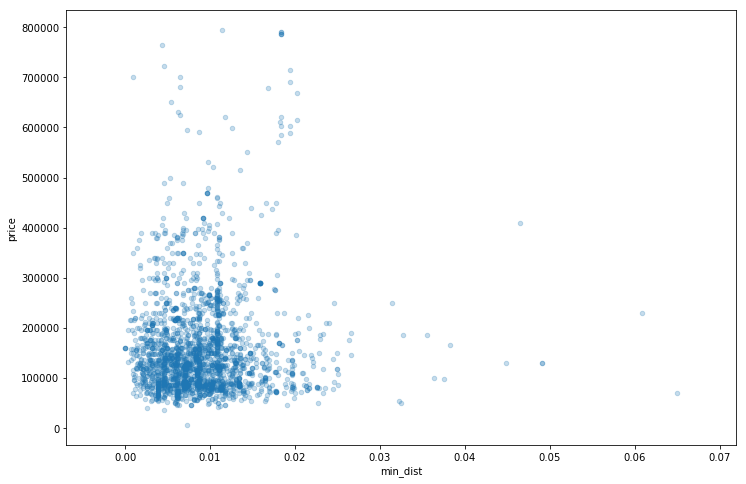

In [9]:
%matplotlib inline
propRecorridoB1 = propRecorridoB[propRecorridoB['price']< 800000]
propRecorridoB2 = propRecorridoB1[propRecorridoB['min_dist']< 0.08]
propRecorridoB2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8))
